# Task 1: Exploratory Data Analysis (EDA)
### Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
import pandas as pd

# Load the dataset
mushroom_df = pd.read_csv("mushroom.csv")

# Display basic information about the dataset
mushroom_df.rename(columns = {"Unnamed: 0" : "Mushroom_ID"}, inplace = True)
print("Shape of the dataset:", mushroom_df.shape)
print("Columns:", mushroom_df.columns)
print("\nSample rows:")
mushroom_df.head()

Shape of the dataset: (2000, 26)
Columns: Index(['Mushroom_ID', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

Sample rows:


,Mushroom_ID,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [2]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mushroom_ID               2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

### Utilize histograms, box plots, or density plots to understand feature distributions.

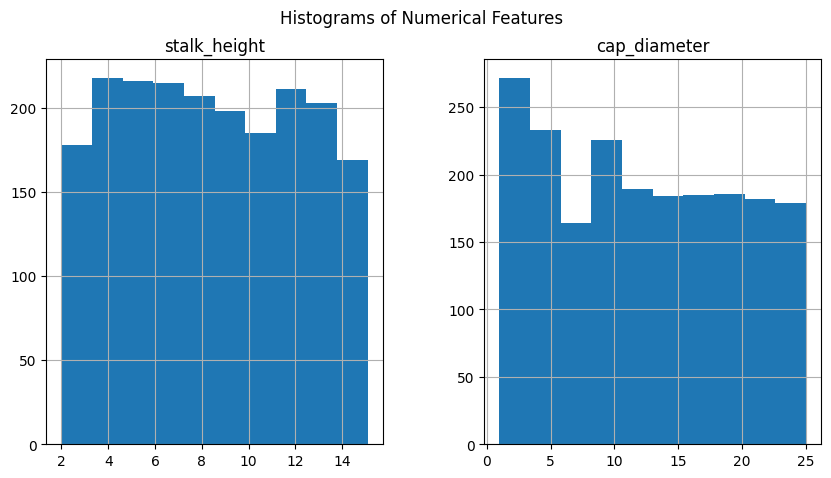

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric and ID columns for visualization and correlation analysis
numeric_df = mushroom_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Mushroom_ID'])

# Plot histograms for numerical features
numeric_df.hist(figsize=(10, 5))
plt.suptitle("Histograms of Numerical Features")
plt.show()

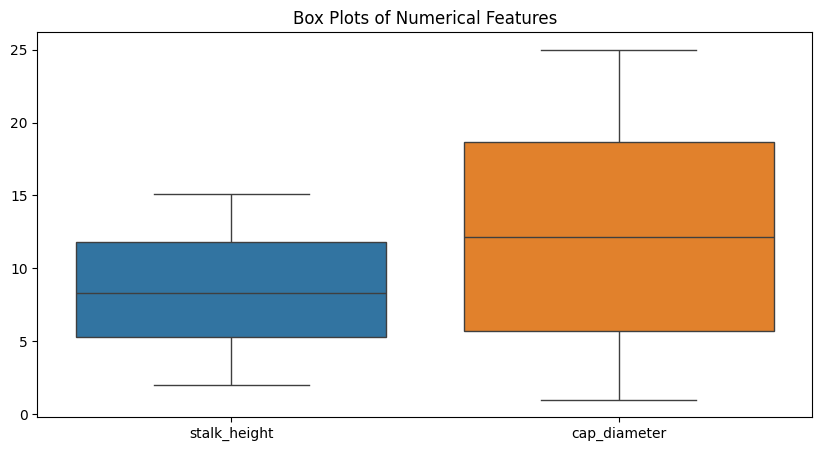

In [4]:
# Plot box plots for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=numeric_df)
plt.title("Box Plots of Numerical Features")
plt.show()

### Investigate feature correlations to discern relationships within the data.

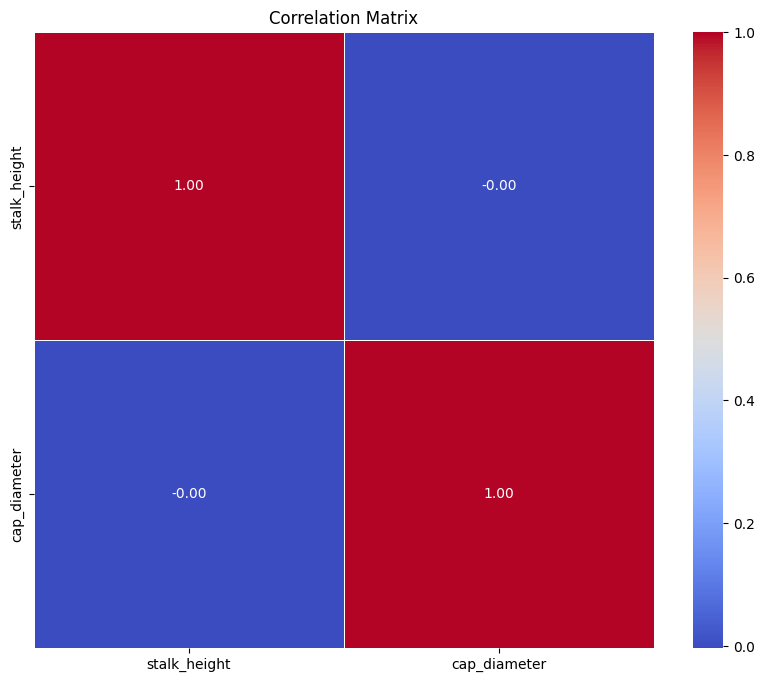

In [5]:
# Compute correlation matrix for numerical features
correlation_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Task 2: Data Preprocessing
### Encode categorical variables if necessary.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Drop the 'mushroom_ID' column before encoding
mushroom_df_encoded = mushroom_df.drop(columns=['Mushroom_ID'])

# Perform one-hot encoding for categorical features
categorical_features = mushroom_df_encoded.select_dtypes(include=['object']).columns
mushroom_df_encoded = pd.get_dummies(mushroom_df_encoded, columns=categorical_features, dtype=int)
mushroom_df_encoded.head()

,stalk_height,cap_diameter,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,...,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_edible,class_poisonous
0,14.276173,5.054983,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,3.952715,19.068319,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,9.054265,7.205884,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,5.226499,20.932692,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,14.037532,12.545245,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Split the dataset into training and testing sets.

In [7]:
# Drop the 'class_poisonous' column
mushroom_df_encoded.drop(columns=["class_poisonous"], axis=1, inplace=True)

# Assign features (X) and target variable (y)
X = mushroom_df_encoded.drop(columns=['class_edible'])
y = mushroom_df_encoded['class_edible']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 126)
Shape of X_test: (400, 126)
Shape of y_train: (1600,)
Shape of y_test: (400,)


# Task 3: Data Visualization
### Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

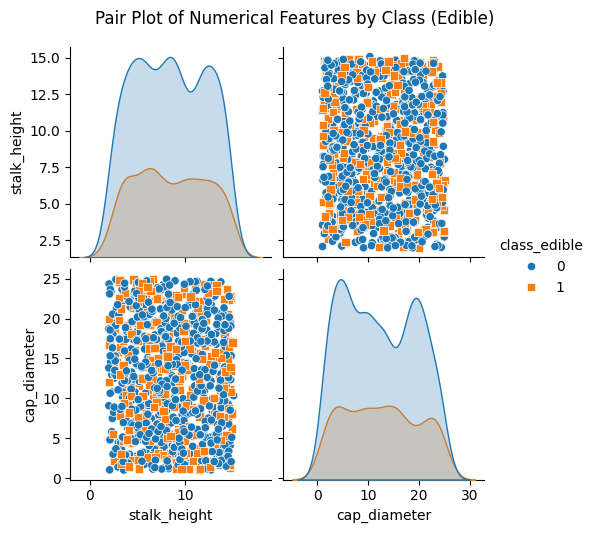

In [8]:
# Scatter plot of numerical features
pair_plot = sns.pairplot(mushroom_df_encoded, vars=["stalk_height", "cap_diameter"], hue="class_edible", markers=["o", "s"])
pair_plot.fig.suptitle("Pair Plot of Numerical Features by Class (Edible)", y=1.05)
plt.show()

### Visualize class distributions to gauge dataset balance or imbalance.

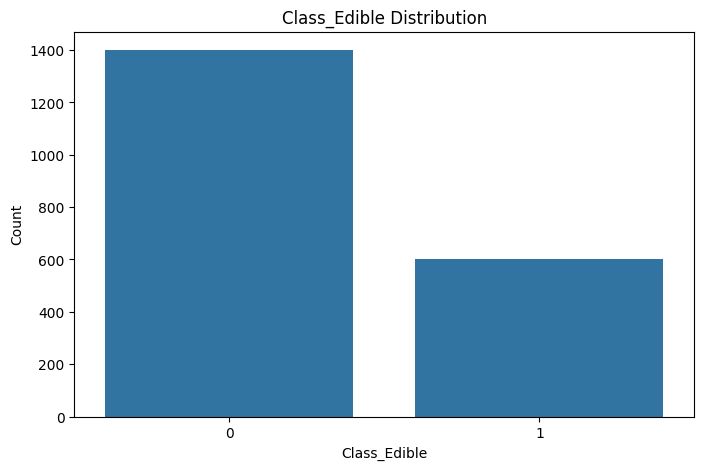

In [9]:
# Visualize class distributions
plt.figure(figsize=(8, 5))
sns.countplot(x='class_edible', data=mushroom_df_encoded)
plt.title("Class_Edible Distribution")
plt.xlabel("Class_Edible")
plt.ylabel("Count")
plt.show()

# Task 4: SVM Implementation
### Implement a basic SVM classifier using Python libraries like scikit-learn.

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVM classifier
svm_classifier = SVC(random_state=42)

### Train the SVM model on the training data.

In [11]:
# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predictions on the testing data
y_pred = svm_classifier.predict(X_test)

### Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Performance:
Accuracy: 0.6675
Precision: 0.0
Recall: 0.0
F1-score: 0.0


## SVM implementation code with hyperparameter tuning using cross-validation:

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'kernel' : ["poly","rbf","sigmoid"], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'C': [10, 20, 30],  # Regularization parameter
    'gamma': [0.01, 0.1, 0.2, 0.3],  
}

In [14]:
# Initialize SVM classifier with sigmoid kernel
svm_classifier = SVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [15]:
# Train SVM model with the best hyperparameters
best_svm_classifier = SVC(**best_params, random_state=42)
best_svm_classifier.fit(X_train, y_train)

# Predictions on the testing data
y_pred = best_svm_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance after Hyperparameter Tuning:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Model Performance after Hyperparameter Tuning:
Accuracy: 0.885
Precision: 0.9887640449438202
Recall: 0.6616541353383458
F1-score: 0.7927927927927927


# Task 5: Visualization of SVM Results

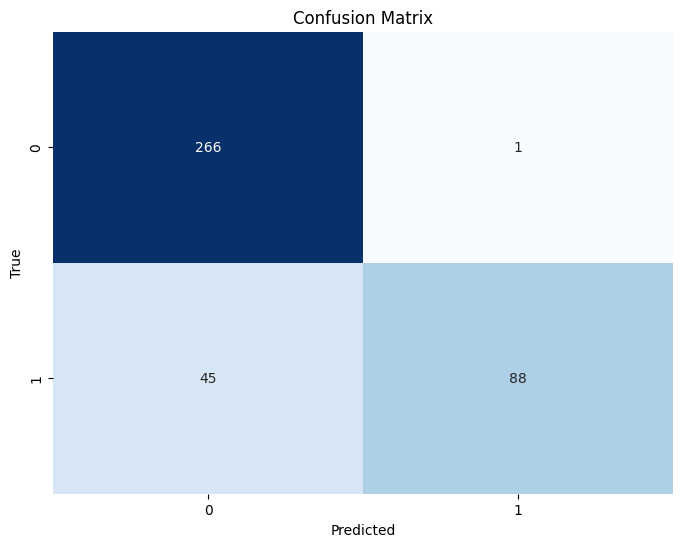

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

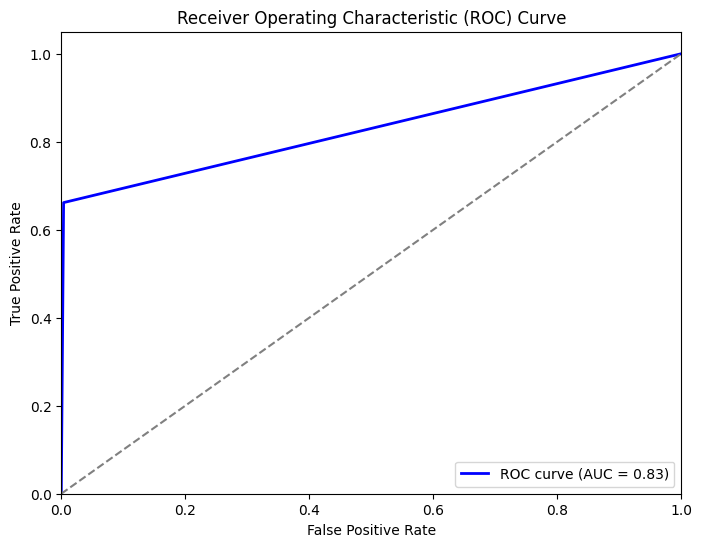

In [17]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# , C = 10, gamma = 0.1

# Task 6: Parameter Tuning and Optimization
## ALREADY DONE IN TASK 4

# Task 7: Comparison and Analysis
### Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

Kernel: sigmoid
  Accuracy: 0.6075
  Precision: 0.2692307692307692
  Recall: 0.10526315789473684
  F1-score: 0.15135135135135133


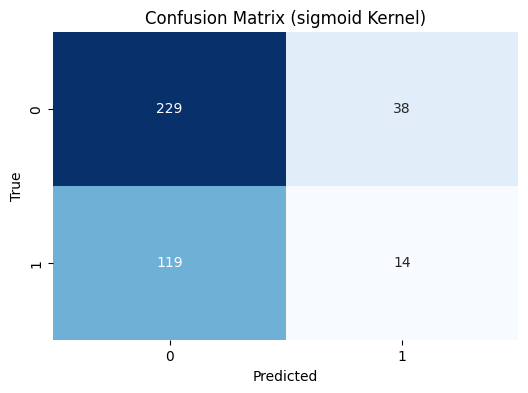

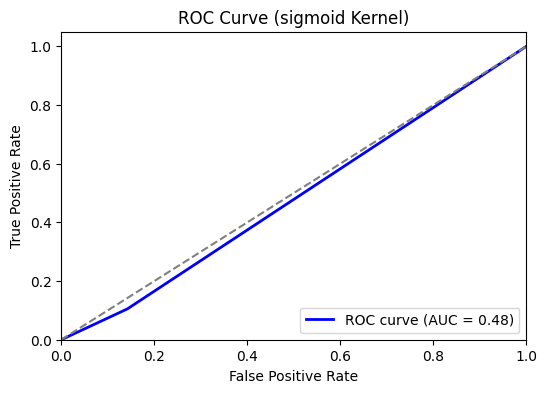

Kernel: poly
  Accuracy: 0.8675
  Precision: 0.8076923076923077
  Recall: 0.7894736842105263
  F1-score: 0.7984790874524715


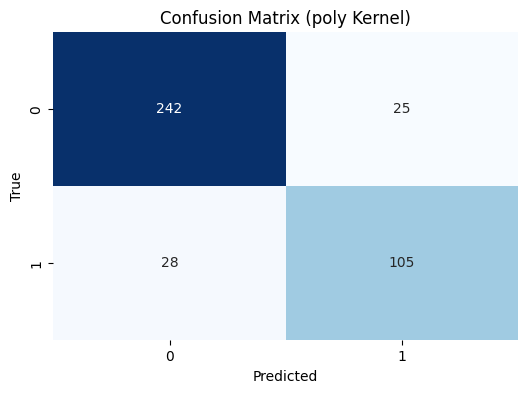

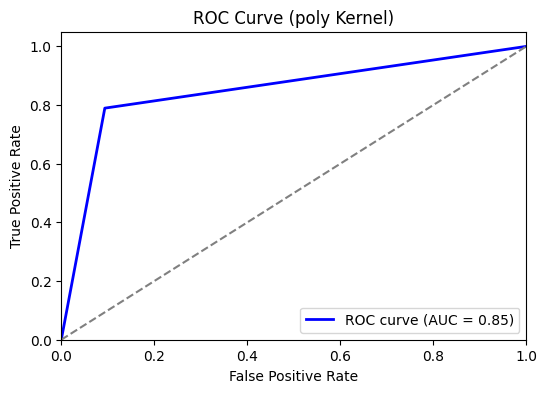

Kernel: rbf
  Accuracy: 0.885
  Precision: 0.9887640449438202
  Recall: 0.6616541353383458
  F1-score: 0.7927927927927927


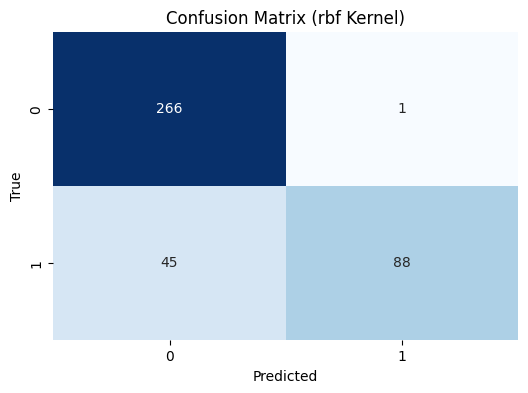

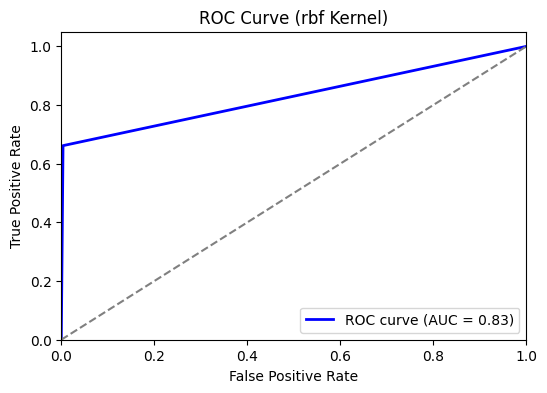

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define kernel types to compare
kernel_types = ['sigmoid', 'poly', 'rbf']

# Initialize dictionaries to store performance metrics for each kernel
performance_metrics = {}

# Iterate over each kernel type
for kernel in kernel_types:
    # Initialize SVM classifier with current kernel
    svm_classifier = SVC(kernel=kernel, random_state=42, C = 10, gamma = 0.1)
    
    # Train the SVM model
    svm_classifier.fit(X_train, y_train)
    
    # Predictions on the testing data
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store performance metrics for the current kernel
    performance_metrics[kernel] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'roc_curve': (fpr, tpr, roc_auc)
    }

# Plot confusion matrix and ROC curve, and print performance metrics for each kernel
for kernel, metrics in performance_metrics.items():
    print(f"Kernel: {kernel}")
    print("  Accuracy:", metrics['accuracy'])
    print("  Precision:", metrics['precision'])
    print("  Recall:", metrics['recall'])
    print("  F1-score:", metrics['f1_score'])
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix ({kernel} Kernel)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Plot ROC curve
    fpr, tpr, roc_auc = metrics['roc_curve']
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({kernel} Kernel)')
    plt.legend(loc="lower right")
    plt.show()

# Analysis of SVM Strengths and Weaknesses:
- SVMs with linear kernel perform well when the data is linearly separable.
- Polynomial kernels can capture non-linear relationships but may be sensitive to the choice of degree parameter.
- RBF kernels are flexible and can capture complex decision boundaries but may overfit if the gamma parameter is too large.
- SVMs are memory efficient since they only use a subset of training points (support vectors) for decision making.
- SVMs may not perform well on noisy data or datasets with overlapping classes.

# Practical Implications of SVM in Real-World Classification Tasks:
- SVMs can be applied to various domains including text classification, image classification, and biomedical applications.
- They are versatile and can handle both binary and multiclass classification tasks.
- However, SVMs may require careful tuning of hyperparameters and may not scale well to large datasets.